In [1]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [2]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' :'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Trocando os valores da tabela 'Vendido': **yes->1**, **no->0**

In [3]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()


,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Transformando a tabela 'ano_do_modelo' para **idade_do_modelo**

In [4]:
from datetime import datetime

ano_atual = datetime.today().year #usando datetime para trazer o anom atual
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


Transformando a tabela 'milhas_por_ano' para **km_por_ano**, 
1.60934 é o valor convertido de 1 milha para km

In [5]:
dados['km_por_ano'] = dados.milhas_por_ano *1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [6]:
dados = dados.drop(columns=["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1) # apagando as colunas que não usaremos, passando o nome das colunas e informando que são as colunas (axis=1), para não apagar as linhas e sim as colunas
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


**Classificando os dados**

**Testando o algoritmo LineaSVC**, para verificar o comportamento dos dados (mais lineares)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 62.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


*Para sabermos se o teste acima foi bom ou não precisamos fazer um treino de baseline, que irá chutar ou tudo 0 ou tudo 1, que é o minimo que o algoritimo precisaria alcançar, para isso vamos usar a biblioteca sklearn com um método "bobinho" o dummy(), e comparando qual melhor acurácia com estrategias diferentes* 

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn-dummy-dummyclassifier



In [8]:
from sklearn.dummy import DummyClassifier

#Usando a estrategia do stratyfied

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) *100

print("A acurácia do dummy_stratified foi %.2f%%" % acuracia)

A acurácia do dummy_stratified foi 52.44%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [9]:
from sklearn.dummy import DummyClassifier

#Usando a estrategia do mostfrequent

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) *100

print("A acurácia do dummy_mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy_mostfrequent foi 50.68%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**Testando o algoritmo SVC**, para verificar um outro comportamento dos dados (mais distribuídos)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler() #Reescalar os dados, tira a media dos dados e dividir pelo desvio padrão, criando um intervalo que é onde os dados estarão
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

#Esse foi bem melhor

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


*Para sabermos qual a regra que o algoritmo usou para classificar o carro que iria ser vendido ou não, usamos um algoritmo especifico (**Árvove de Decisão**)*

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler() #Reescalar os dados, tira a media dos dados e dividir pelo desvio padrão, criando um intervalo que é onde os dados estarão
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3) #esse parâmetro mostra a arvore de acordo com a profundidade (condições), nesse caso, mostra  2 condições -> isso vai facilitar a visualização do grafico
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(treino_x)


acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


Solicitando a visualização grafica do modelo de árvore de decisão



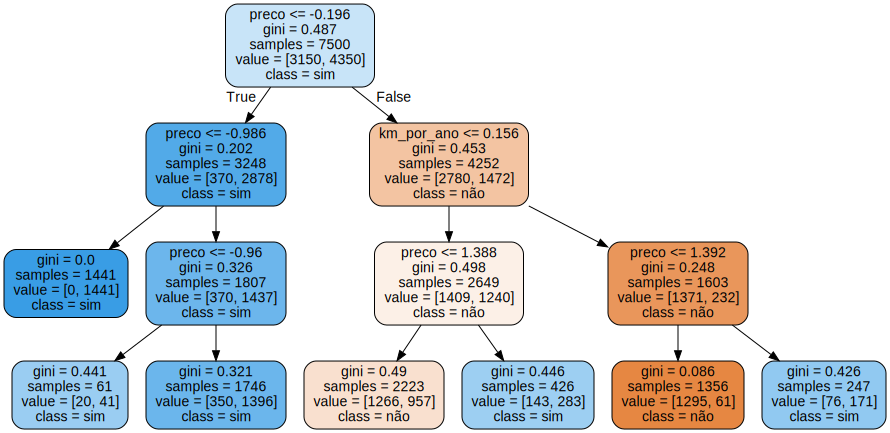

In [22]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names = features, filled = True, rounded = True,class_names = ["não", "sim"]) #dot_data é o formato que esse metodo mostra o grafico
grafico = graphviz.Source(dot_data)
grafico

Documentação: https://scikit-learn.org/stable/supervised_learning.html